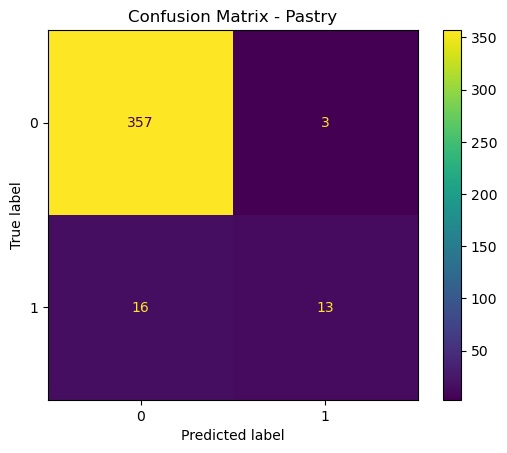

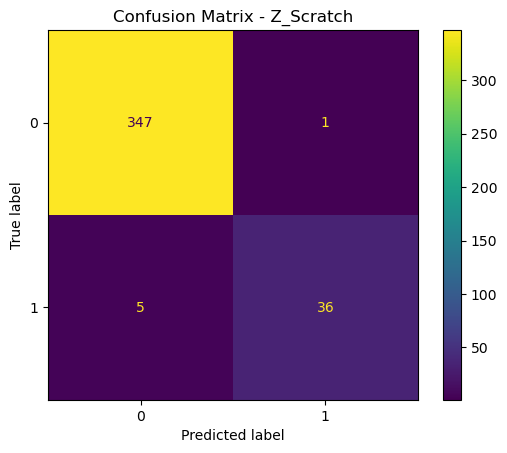

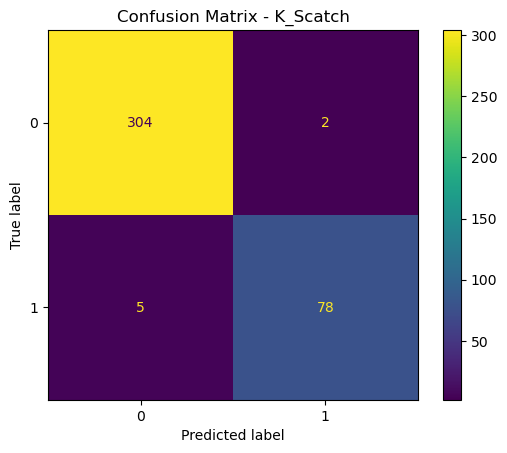

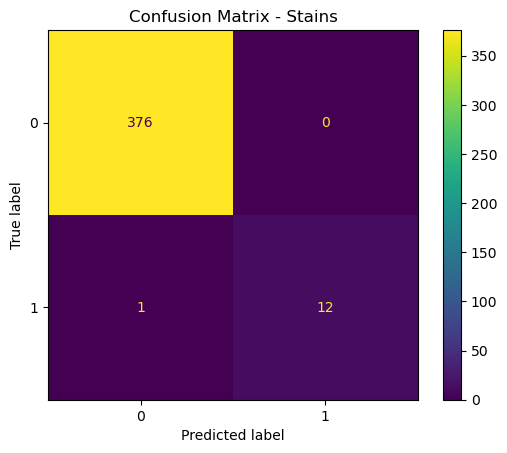

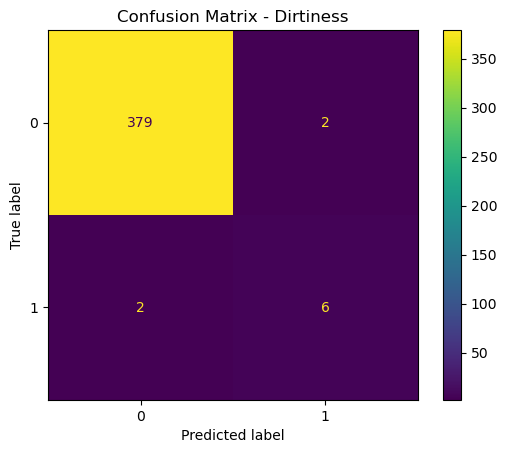

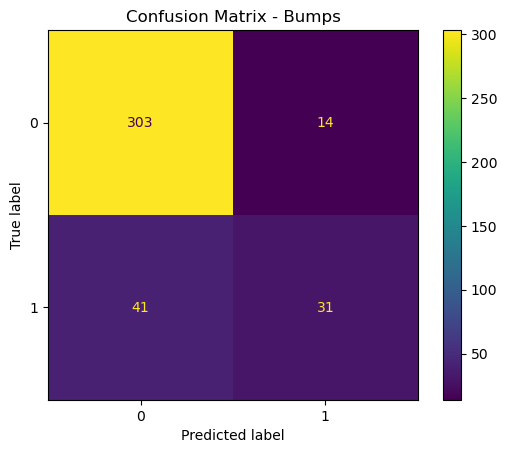

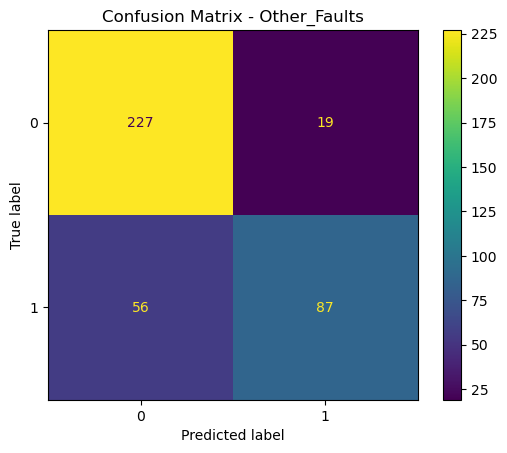

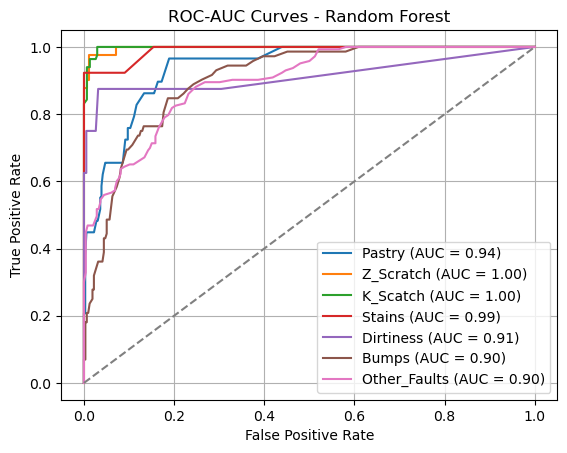

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Load and prepare data
df = pd.read_csv("Original.csv")
df.drop(columns=["id"], inplace=True)

target_cols = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']
X = df.drop(columns=target_cols)
y = df[target_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train best model (Random Forest)
model = MultiOutputClassifier(RandomForestClassifier())
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)

# Plot confusion matrix for each label
for i, label in enumerate(target_cols):
    cm = confusion_matrix(y_test.iloc[:, i], y_pred[:, i])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot()
    plt.title(f"Confusion Matrix - {label}")
    plt.grid(False)
    plt.show()

# Plot ROC-AUC curve for each label
for i, label in enumerate(target_cols):
    fpr, tpr, _ = roc_curve(y_test.iloc[:, i], y_prob[i][:, 1])
    auc = roc_auc_score(y_test.iloc[:, i], y_prob[i][:, 1])
    plt.plot(fpr, tpr, label=f"{label} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curves - Random Forest")
plt.legend()
plt.grid(True)
plt.show()
